# Time Series: Weather Data

Data from https://www.ecad.eu/

In [1]:
from copy import copy

import pandas as pd
import numpy as np
import numpy.matlib

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

## Data

In [2]:
filepath = "../data/ECA_blended_custom/TG_STAID002759.txt"

The file header states
* "MISSING VALUE CODE IS -9999"
* "mean temperature in 0.1 °C"

In [3]:
df = pd.read_csv(filepath
                 ,skiprows = 19 # skip info lines above csv part
                 ,skipinitialspace = True # to get clean column names
                 ,na_values = [-9999])

In [4]:
# datetime format string doc: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y%m%d")

In [5]:
df.set_index('DATE', inplace=True)

In [6]:
df['TG'] = 0.1 * df['TG']

In [7]:
df.head()

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,2.2,0
1876-01-02,127488,2.5,0
1876-01-03,127488,0.3,0
1876-01-04,127488,-5.8,0
1876-01-05,127488,-9.8,0


## Explore
*https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#indexing*

### One year of the data set

<AxesSubplot:xlabel='DATE', ylabel='Temperature'>

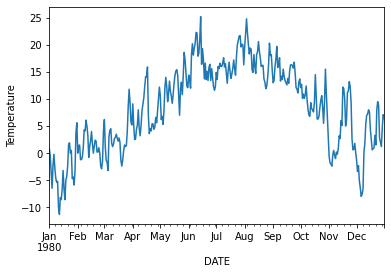

In [8]:
df.loc['1980','TG'].plot(ylabel='Temperature')

### All years in one plot

*https://atedstone.github.io/pandas-plot-seasons-time-series/*

In [9]:
df['Day of Year'] = df.index.dayofyear
df['Year'] = df.index.year
piv = pd.pivot(df, index='Day of Year', columns='Year', values='TG')

<AxesSubplot:xlabel='Day of Year', ylabel='Temperature'>

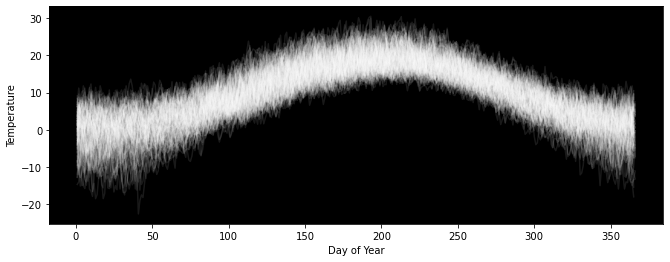

In [10]:
fig, ax = plt.subplots(figsize=(11,4))
ax.set_facecolor('k')
piv.plot(kind='line', c='white', alpha=0.1, ax=ax, legend=False, ylabel='Temperature')

### Time Series Historgram

Alternatives
* `sns.displot(data=df, y='TG', x='Day of Year')`
* The hard way: https://matplotlib.org/stable/gallery/statistics/time_series_histogram.html

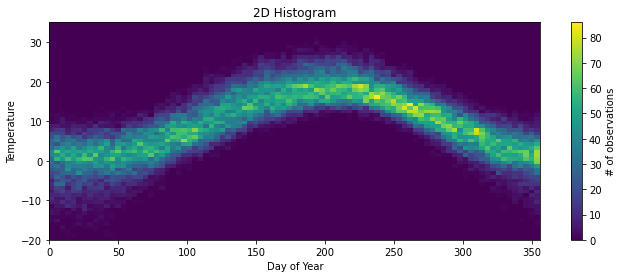

In [11]:
fig, ax = plt.subplots(figsize=(11,4))
_, _, _, im = ax.hist2d(data=df, y='TG', x='Day of Year'
              ,bins=[int(356/4), 60], range=[[0,356],[-20,35]])
ax.set_title('2D Histogram')
ax.set_ylabel('Temperature')
ax.set_xlabel('Day of Year')
fig.colorbar(im, ax=ax, label="# of observations")

Around day 250 we see bright spots. This is because the distribution is narrower at this region. As a result more observations are mapped to the same 2D-bin.

### All years with standard deviation band

Text(0, 0.5, 'Temperature')

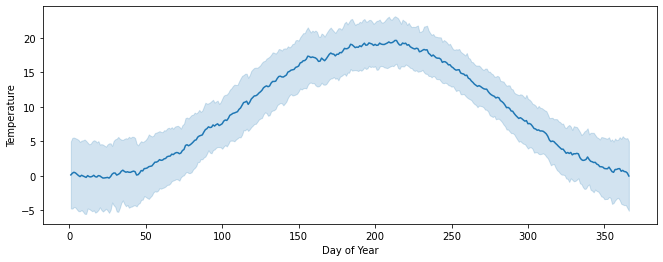

In [12]:
fig, ax = plt.subplots(figsize=(11,4))
sns.lineplot(data=df, x="Day of Year", y="TG", ci='sd', ax=ax)
ax.set_ylabel("Temperature")

### Heatmap

<AxesSubplot:title={'center':'NaN'}, xlabel='Year', ylabel='Day of Year'>

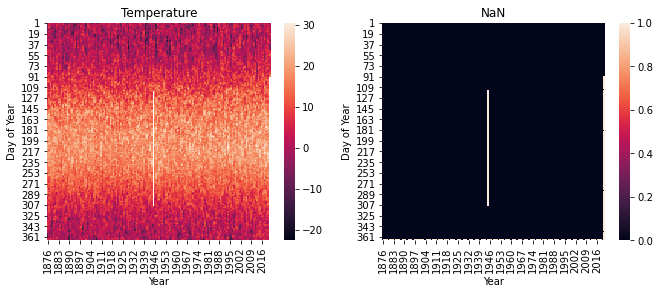

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11,4))
ax1.set_title('Temperature')
sns.heatmap(piv, ax=ax1)
ax2.set_title('NaN')
sns.heatmap(piv.isna(), ax=ax2)

Further ideas:
* https://seaborn.pydata.org/examples/kde_ridgeplot.html
* 3D surface plot of Heatmap
* Sonification of data